# Q2

2. Now, using Tensor
ow you are to set up the graph of the f2 function
as described in Q1, and then compute the derivatives with respect to
variables x; y and z. To do so, create a python file called hw2Q2.py.
Please note: There are some important disterences between Tensor
ow
version 1.xx and Tensor
ow version 2.xx. In particular, version 2 and
above do not require initialization since they now by default implement
eager execution, which means, Tensor
ow evaluates expressions as needed
without waiting for the graph to be built. Also, for gradient computing
a construct known as GradientTape has to be used. See the Tensor
ow
tutorial webpage for more information. Also in the Lecture Notes tab at
Sakai, I have updated the examples and added version 2 examples as well.
In the file hw2Q2.py at the top, make sure to both state the version of
Tensor
ow software you are using and print the version, as follows:
Tensorflow version 1.14 is used
print("Tensorflow version:", tf.__version__)

(a). Write python script building the Tensor
ow graph implementing the
function f2 as described in Q1. Print both the value of f(x; y; z) at
x = 1; y = 1; z = 1, and also the value of the gradient vector of f2 at
these values.

In [1]:
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.1.0


In [2]:
with tf.GradientTape() as gt:
    # Define the variables
    x = tf.Variable(1, dtype=tf.float32, name="x") 
    y = tf.Variable(1, dtype=tf.float32, name="y")
    z = tf.Variable(1, dtype=tf.float32, name="z")
        
    n1 = x*y
    n2 = n1*y
    n3 = tf.math.sigmoid(n1+y)
    n4 = 2*n3+x
    f2 = (tf.math.exp(n3))/(tf.math.exp(n1)+tf.math.exp(n3)+tf.math.exp(n4))

gt = gt.gradient(f2,[x,y,z])
gt1 = gt[0].numpy()
gt2 = gt[1].numpy()

print("f2 function: ")
print("x=", x.numpy(), "y=", y.numpy(), "z=", z.numpy())
print("n1=", n1.numpy(),"n2=", n2.numpy(), "n3=", n3.numpy(), "n4=", n4.numpy())
print("f2=", f2.numpy())
print("g1=", gt1, "g2=", gt2)

f2 function: 
x= 1.0 y= 1.0 z= 1.0
n1= 1.0 n2= 1.0 n3= 0.880797 n4= 2.761594
f2= 0.11513669
g1= -0.10944091 g2= -0.030056061


In [3]:
# The value of the gradient vector of f2
def gradient_value(g1, g2, g3):
    x = g1
    y = g2
    z = g3
        
    n1 = x*y
    n2 = n1*y
    n3 = tf.math.sigmoid(n1+y)
    n4 = 2*n3+x
    f2 = (tf.math.exp(n3))/(tf.math.exp(n1)+tf.math.exp(n3)+tf.math.exp(n4))
    return f2

print("The value of the gradient vector of f2 is: {}"\
      .format(gradient_value(gt1, gt2, g3=None)))

The value of the gradient vector of f2 is: 0.3246156573295593


# Q3a

3. Keras/Python Project: This exercise continues the fashion-nist data
you worked on in the last homework. We are going to add various regu-
larization techniques and see if there is a significant improvement in the
plain approach.
3a).Do not use the entire training data. Instead randomly select 50,000 of
the 60,000 data points as your actual training set, and the remaining
10,000 points as your validation data. Experiment both with 2 and
1 norms for regularization. Choose $\alpha$ = :01, and $\alpha$ = :001. Use 20
epochs. Once done, graph the error rate with respect to the training
data, and with respect to the validation data Does any of these combi-
nations perform better than the results you obtained from homework
1? Also, make sure to both print and darw as a heat map the confu-
sion matrix of the error rate for the test set.Submit the answer for
this homework in a file named hw2Q3a.py.

In [4]:
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
np.random.seed(9)

Using TensorFlow backend.


In [5]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [6]:
# Shuffle the training data
temp_trainIM = list(enumerate(train_images))
temp_trainLB_1 = list(enumerate(train_labels))
np.random.shuffle(temp_trainIM)

temp_trainLB = []
for i in temp_trainIM:
    temp_trainLB.append(temp_trainLB_1[i[0]])

train_images = []
train_labels = []
for i in temp_trainIM:
    train_images.append(i[1])
for i in temp_trainLB:
    train_labels.append(i[1])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
# Split the training and validation sets
training_images = train_images[:50000,]
training_labels = train_labels[:50000,]
# Set the validation set
validation_images = train_images[:-50000,]
validation_labels = train_labels[:-50000,]
# display(training_images.shape, training_labels.shape, validation_images.shape, validation_labels.shape,
#        test_images.shape, test_labels.shape)

In [8]:
training_images = training_images.astype("float32")/255
validation_images = validation_images.astype("float")/255
test_images = test_images.astype("float")/255

training_labels01 = to_categorical(training_labels)
validation_labels01 = to_categorical(validation_labels)
test_labels01 = to_categorical(test_labels)

In [9]:
# Build the neural network
from keras import regularizers

inputLayer = Input(shape=(28,28))
tmp = Flatten()(inputLayer)
# l1 and l2 norm regularization: 
tmp = Dense(units=512, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.001))(tmp)
outputLayer = Dense(units=10, activation="softmax")(tmp)

network = Model(inputLayer, outputLayer)
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = network.fit(training_images,training_labels01, epochs=20, batch_size=128,
                      validation_data=(validation_images,validation_labels01))

test_loss, test_acc = network.evaluate(test_images,test_labels01)
print("test loss:", test_loss, "test accuracy:", test_acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 72us/step - loss: 9.7915 - accuracy: 0.5599 - val_loss: 3.4990 - val_accuracy: 0.6640
Epoch 2/20
50000/50000 [==============================] - 3s 63us/step - loss: 3.4240 - accuracy: 0.6834 - val_loss: 3.3083 - val_accuracy: 0.7094
Epoch 3/20
50000/50000 [==============================] - 3s 61us/step - loss: 3.2671 - accuracy: 0.7111 - val_loss: 3.3131 - val_accuracy: 0.7083
Epoch 4/20
50000/50000 [==============================] - 3s 61us/step - loss: 3.1768 - accuracy: 0.7251 - val_loss: 3.1657 - val_accuracy: 0.7354
Epoch 5/20
50000/50000 [==============================] - 3s 59us/step - loss: 3.1235 - accuracy: 0.7310 - val_loss: 3.1305 - val_accuracy: 0.7172
Epoch 6/20
50000/50000 [==============================] - 3s 61us/step - loss: 3.0793 - accuracy: 0.7384 - val_loss: 3.0886 - val_accuracy: 0.7455
Epoch 7/20
50000/50000 [==============================] - 3s 59us/st

keys of history.histry: dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


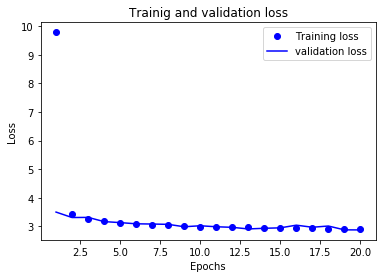

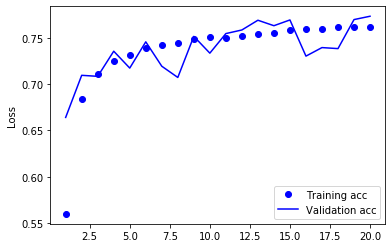

In [11]:
import matplotlib.pyplot as plt
history_dic = history.history
# This line shows history_dic's keys. You can comment it out after
# the first run
print("keys of history.histry:",history_dic.keys())
loss_values=history_dic['loss']
validation_loss_values=history_dic['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs,validation_loss_values,'b',label="validation loss")
plt.title("Trainig and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plot training and valuation accuracy:
acc_values=history_dic['accuracy']
validation_acc_values=history_dic['val_accuracy']

plt.plot(epochs,acc_values, 'bo', label="Training acc")
plt.plot(epochs,validation_acc_values, 'b',label="Validation acc") 
plt.ylabel('Loss')
plt.legend()
plt.show()

The confustion matrix:
 [[769   8  25 106   4  19  50   0  18   1]
 [  3 921  15  54   4   1   0   1   1   0]
 [ 23   2 769  15 143   7  32   0   9   0]
 [ 37  11  27 886  14   5  15   0   3   2]
 [  2   5 233  77 612   4  59   0   8   0]
 [  0   0   0   1   0 871   0  64   1  63]
 [218   2 184  85 186  24 268   0  33   0]
 [  0   0   0   0   0  96   0 822   0  82]
 [  1   1  27  30   1  79  15  12 830   4]
 [  0   0   0   1   0  41   0  41   0 917]]


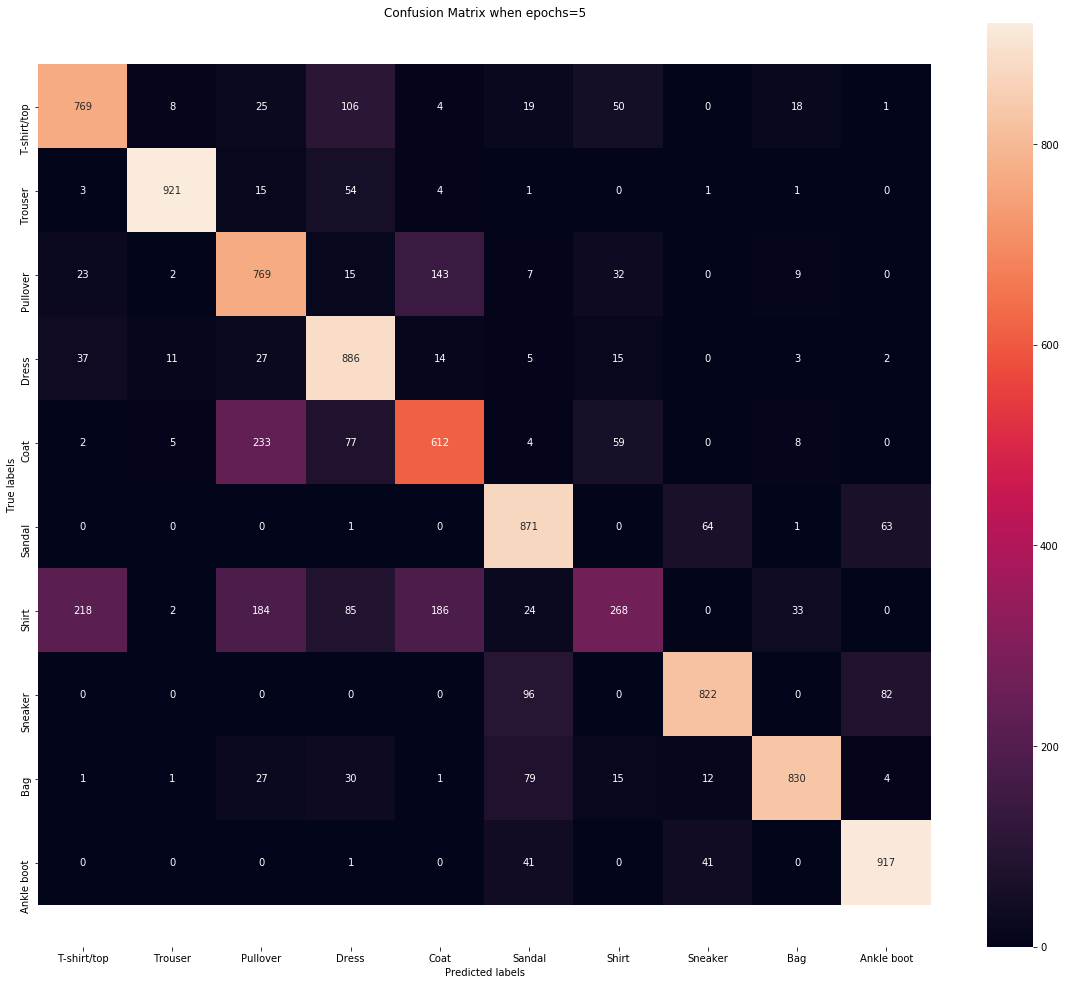

In [12]:
# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=5' )
ax.xaxis.set_ticklabels(names); ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

Conclusion:
    This model is worse than the model which was built in homework 1.

3b). Repeat part a) but instead of norm regularization, use Dropout layers
between all layers. Use a dropout rate of only 20% for the input layer,
and a rate of 50% for the others. Submit your work in a le called
hw2Q3b.py

In [13]:
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
np.random.seed(9)

In [14]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [15]:
# Shuffle the training data
temp_trainIM = list(enumerate(train_images))
temp_trainLB_1 = list(enumerate(train_labels))
np.random.shuffle(temp_trainIM)

temp_trainLB = []
for i in temp_trainIM:
    temp_trainLB.append(temp_trainLB_1[i[0]])

train_images = []
train_labels = []
for i in temp_trainIM:
    train_images.append(i[1])
for i in temp_trainLB:
    train_labels.append(i[1])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [16]:
# Split the training and validation sets
training_images = train_images[:50000,]
training_labels = train_labels[:50000,]
# Set the validation set
validation_images = train_images[:-50000,]
validation_labels = train_labels[:-50000,]
# display(training_images.shape, training_labels.shape, validation_images.shape, validation_labels.shape,
#        test_images.shape, test_labels.shape)

In [17]:
training_images = training_images.astype("float32")/255
validation_images = validation_images.astype("float")/255
test_images = test_images.astype("float")/255

training_labels01 = to_categorical(training_labels)
validation_labels01 = to_categorical(validation_labels)
test_labels01 = to_categorical(test_labels)

In [18]:
# Dropout layers:
inputLayer = Input(shape=(28,28))
tmp = Flatten()(inputLayer)

# Add dropout layers: 
# Use a dropout rate of only 20% for the input layer,and a rate of 50% for the others.
tmp = Dropout(rate=0.2)(tmp)
tmp = Dense(units=512, activation="relu")(tmp)
tmp = Dropout(rate=0.5)(tmp)
outputLayer = Dense(units=10, activation="softmax")(tmp)

network = Model(inputLayer, outputLayer)
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
history = network.fit(training_images,training_labels01, epochs=20, batch_size=128,
                      validation_data=(validation_images,validation_labels01))

test_loss, test_acc = network.evaluate(test_images,test_labels01)
print("test loss:", test_loss, "test accuracy:", test_acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 56us/step - loss: 0.6519 - accuracy: 0.7667 - val_loss: 0.4542 - val_accuracy: 0.8393
Epoch 2/20
50000/50000 [==============================] - 3s 55us/step - loss: 0.4837 - accuracy: 0.8257 - val_loss: 0.4111 - val_accuracy: 0.8498
Epoch 3/20
50000/50000 [==============================] - 3s 58us/step - loss: 0.4431 - accuracy: 0.8404 - val_loss: 0.4006 - val_accuracy: 0.8548
Epoch 4/20
50000/50000 [==============================] - 3s 53us/step - loss: 0.4213 - accuracy: 0.8490 - val_loss: 0.3835 - val_accuracy: 0.8616
Epoch 5/20
50000/50000 [==============================] - 3s 52us/step - loss: 0.4072 - accuracy: 0.8548 - val_loss: 0.3319 - val_accuracy: 0.8803
Epoch 6/20
50000/50000 [==============================] - 3s 55us/step - loss: 0.4002 - accuracy: 0.8577 - val_loss: 0.3440 - val_accuracy: 0.8739
Epoch 7/20
50000/50000 [==============================] - 3s 57us/st

keys of history.histry: dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


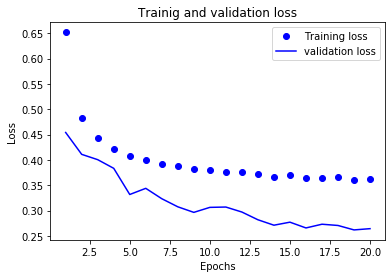

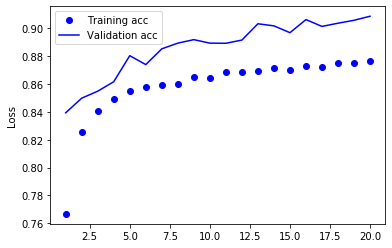

In [19]:
import matplotlib.pyplot as plt
history_dic = history.history
# This line shows history_dic's keys. You can comment it out after
# the first run
print("keys of history.histry:",history_dic.keys())
loss_values=history_dic['loss']
validation_loss_values=history_dic['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs,validation_loss_values,'b',label="validation loss")
plt.title("Trainig and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plot training and valuation accuracy:
acc_values=history_dic['accuracy']
validation_acc_values=history_dic['val_accuracy']

plt.plot(epochs,acc_values, 'bo', label="Training acc")
plt.plot(epochs,validation_acc_values, 'b',label="Validation acc") 
plt.ylabel('Loss')
plt.legend()
plt.show()

The confustion matrix:
 [[881   0  12  19   4   1  73   0  10   0]
 [  6 961   1  22   4   0   3   0   3   0]
 [ 14   0 770   9 140   0  62   0   4   1]
 [ 35   2  13 877  46   0  23   0   4   0]
 [  0   0  89  24 847   0  38   0   2   0]
 [  0   0   0   0   0 947   0  30   2  21]
 [167   0  81  21 104   0 611   0  16   0]
 [  0   0   0   0   0   5   0 948   0  47]
 [  2   0   3   3   5   2   0   4 980   1]
 [  0   0   0   0   0   3   1  23   0 973]]


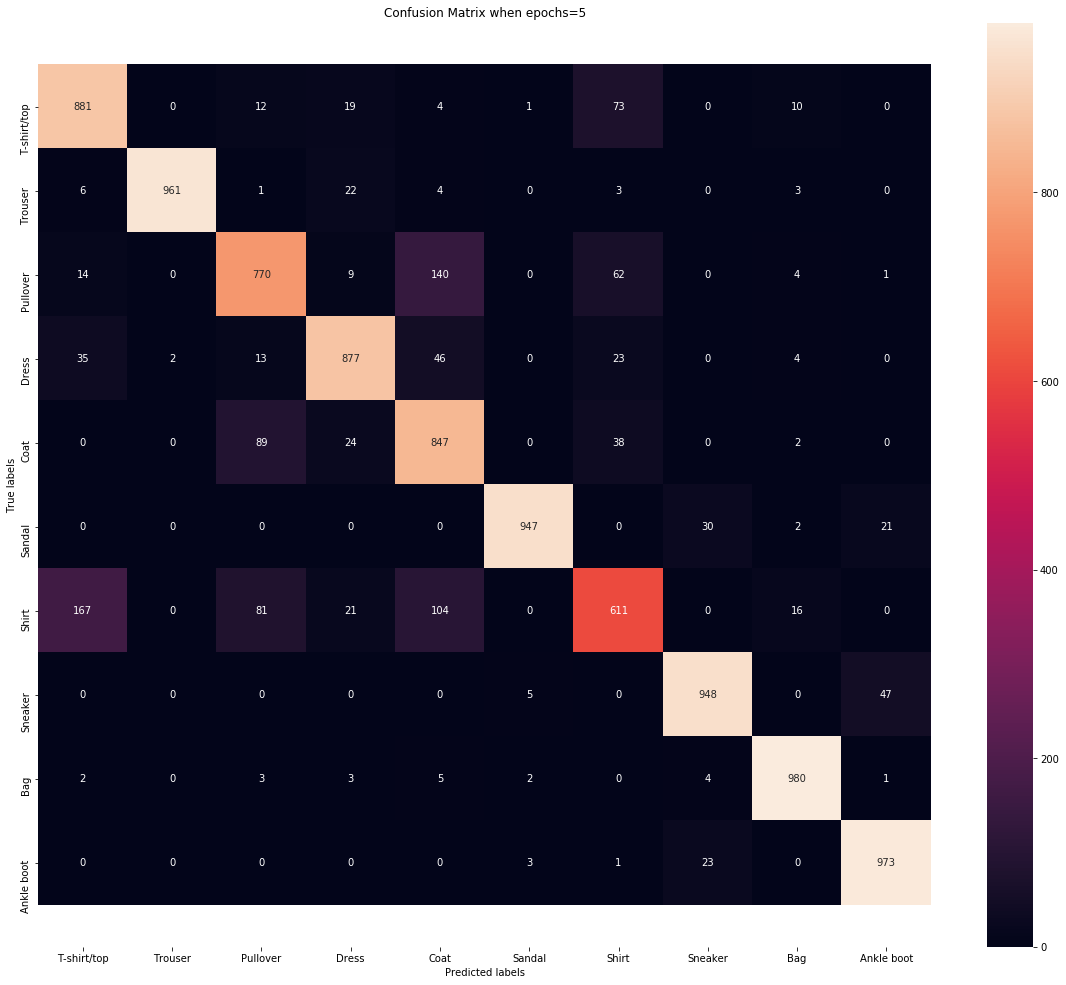

In [20]:
# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=5' )
ax.xaxis.set_ticklabels(names); ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

3c). Repeate3c) Repeate part a) but instead of norm regularization, use early stop-
ping. set the epoch parameter to 100. At what epoch number did
the process stop? Is the results better than those you obtained in
homework 1? Submit your work in a tile called hw2Q3c.py. part a) but instead of norm regularization, use early stop-
ping. set the epoch parameter to 100. At what epoch number did
the process stop? Is the results better than those you obtained in
homework 1? Submit your work in a file called hw2Q3c.py.

In [21]:
import tensorflow as tf
from tensorflow import keras
print("tesnorflow version:", tf.__version__, "Keras version:",keras.__version__)
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
np.random.seed(9)

tesnorflow version: 2.1.0 Keras version: 2.2.4-tf


In [22]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [23]:
#%%
# Shuffle the training data
temp_trainIM = list(enumerate(train_images))
temp_trainLB_1 = list(enumerate(train_labels))
np.random.shuffle(temp_trainIM)

temp_trainLB = []
for i in temp_trainIM:
    temp_trainLB.append(temp_trainLB_1[i[0]])

train_images = []
train_labels = []
for i in temp_trainIM:
    train_images.append(i[1])
for i in temp_trainLB:
    train_labels.append(i[1])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [24]:
# Split the training and validation sets
training_images = train_images[:50000,]
training_labels = train_labels[:50000,]
# Set the validation set
validation_images = train_images[:-50000,]
validation_labels = train_labels[:-50000,]
# display(training_images.shape, training_labels.shape, validation_images.shape, validation_labels.shape,
#        test_images.shape, test_labels.shape)

In [25]:
training_images = training_images.astype("float32")/255
validation_images = validation_images.astype("float")/255
test_images = test_images.astype("float")/255

training_labels01 = to_categorical(training_labels)
validation_labels01 = to_categorical(validation_labels)
test_labels01 = to_categorical(test_labels)

In [26]:
# Use EarlyStopping instead of norm regularization
from keras import regularizers

inputLayer = Input(shape=(28,28))
tmp = Flatten()(inputLayer)
tmp = Dense(units=512, activation="relu")(tmp)
outputLayer = Dense(units=10, activation="softmax")(tmp)

network = Model(inputLayer, outputLayer)
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
# Early Stopping
earlyStoppingCB = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = network.fit(training_images,training_labels01, epochs=100, batch_size=128,
                      validation_data=(validation_images,validation_labels01),
                      callbacks=[earlyStoppingCB])

test_loss, test_acc = network.evaluate(test_images,test_labels01)
print("test loss:", test_loss, "test accuracy:", test_acc)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 46us/step - loss: 0.5811 - accuracy: 0.7946 - val_loss: 0.4544 - val_accuracy: 0.8350
Epoch 2/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.3973 - accuracy: 0.8551 - val_loss: 0.3301 - val_accuracy: 0.8818
Epoch 3/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.3475 - accuracy: 0.8727 - val_loss: 0.3494 - val_accuracy: 0.8672
Epoch 4/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.3199 - accuracy: 0.8830 - val_loss: 0.3073 - val_accuracy: 0.8839
Epoch 5/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.2988 - accuracy: 0.8904 - val_loss: 0.2761 - val_accuracy: 0.9004
Epoch 6/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.2833 - accuracy: 0.8949 - val_loss: 0.2878 - val_accuracy: 0.8926
Epoch 7/100
50000/50000 [==============================] - 2s 

Epoch 56/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.0840 - accuracy: 0.9712 - val_loss: 0.0559 - val_accuracy: 0.9807
Epoch 57/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.0854 - accuracy: 0.9708 - val_loss: 0.0966 - val_accuracy: 0.9684
Epoch 58/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.0820 - accuracy: 0.9719 - val_loss: 0.0595 - val_accuracy: 0.9783
Epoch 59/100
50000/50000 [==============================] - 2s 44us/step - loss: 0.0789 - accuracy: 0.9725 - val_loss: 0.0736 - val_accuracy: 0.9720
Epoch 60/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.0772 - accuracy: 0.9743 - val_loss: 0.1266 - val_accuracy: 0.9599
Epoch 61/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.0767 - accuracy: 0.9740 - val_loss: 0.1641 - val_accuracy: 0.9533
Epoch 62/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.0809 - accuracy: 0.9732

keys of history.histry: dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


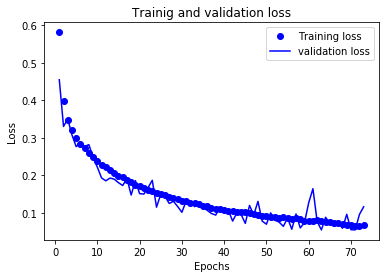

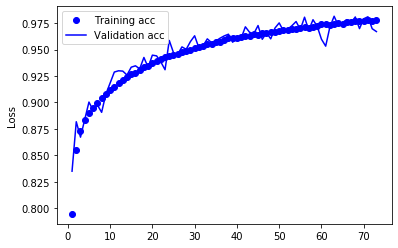

In [27]:
import matplotlib.pyplot as plt
history_dic = history.history
# This line shows history_dic's keys. You can comment it out after
# the first run
print("keys of history.histry:",history_dic.keys())
loss_values=history_dic['loss']
validation_loss_values=history_dic['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs,validation_loss_values,'b',label="validation loss")
plt.title("Trainig and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plot training and valuation accuracy:
acc_values=history_dic['accuracy']
validation_acc_values=history_dic['val_accuracy']

plt.plot(epochs,acc_values, 'bo', label="Training acc")
plt.plot(epochs,validation_acc_values, 'b',label="Validation acc") 
plt.ylabel('Loss')
plt.legend()
plt.show()

The confustion matrix:
 [[859   3  15  19   5   1  92   1   5   0]
 [  6 979   0  10   2   0   2   0   1   0]
 [ 22   1 817   7  86   1  65   0   1   0]
 [ 16   9  20 919  15   0  15   0   6   0]
 [  1   0  76  45 823   1  53   0   1   0]
 [  0   0   0   1   0 957   0  19   2  21]
 [134   1  78  26  73   0 677   0  11   0]
 [  0   0   0   0   0   9   0 966   1  24]
 [  3   0   4   4   1   2   5   7 974   0]
 [  0   0   0   0   0   9   1  38   1 951]]


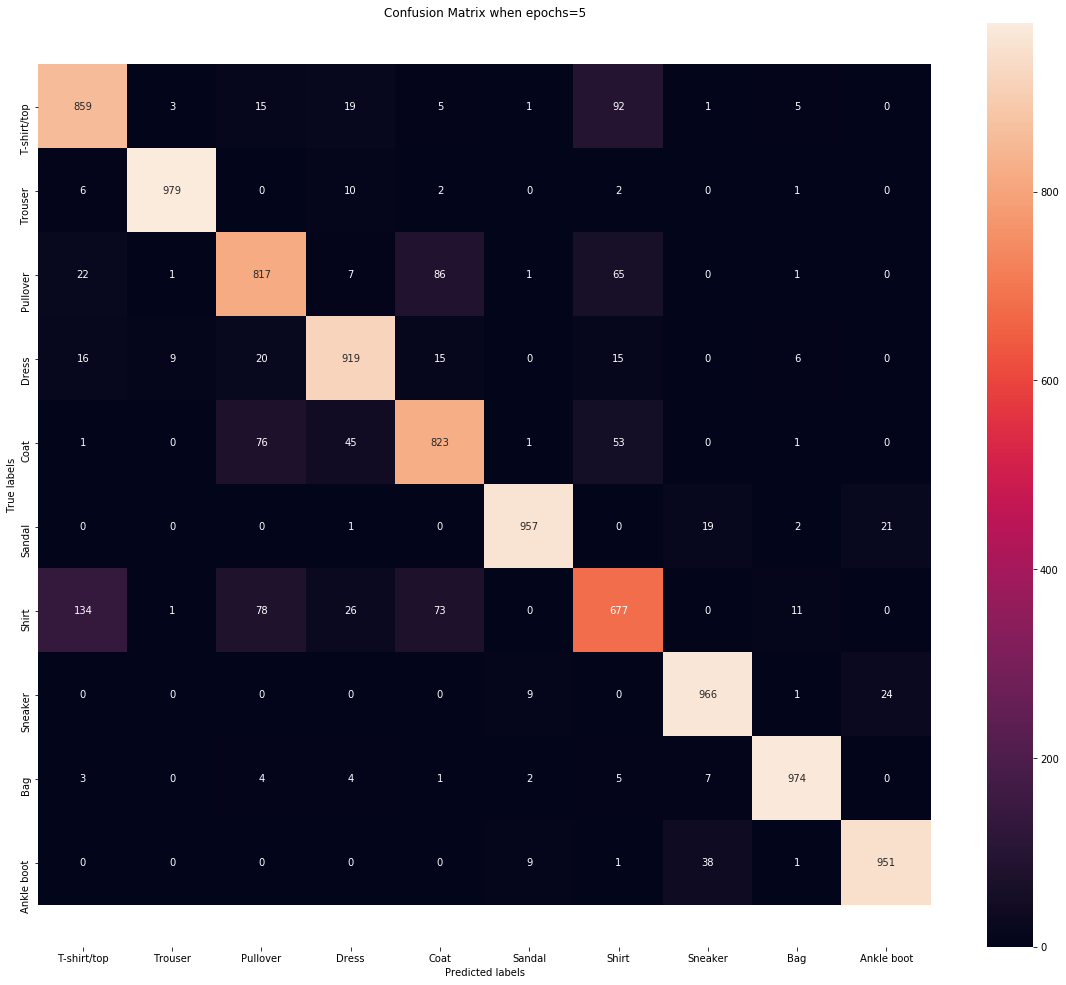

In [28]:
# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix

pred = network.predict(test_images)
# We can not use "test_labels" because it handles after "to_categorical" method !
confusionMatrix = confusion_matrix(test_labels, list(map(np.argmax,pred)))
print("The confustion matrix:\n", confusionMatrix)

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (20,17))
ax= plt.subplot()
sns.heatmap(confusionMatrix, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix when epochs=5' )
ax.xaxis.set_ticklabels(names); ax.yaxis.set_ticklabels(names)

b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.show()

Conslusion: This model is better than the model which was built by homework 1.